In [1]:
pip install opencv

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement opencv (from versions: none)
ERROR: No matching distribution found for opencv


In [2]:
import os 
import numpy as np  
import cv2 as cv 
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
import random as rd
from sklearn.svm import SVC

In [3]:
def apply_noise_reduction(image):
    # Choose your preferred technique(s):
    # image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)  # Normalization
    # image = cv2.equalizeHist(image)  # Histogram Equalization
    image = cv.medianBlur(image, 5)  # Median Filtering
    # image = cv2.bilateralFiltering(image, 9, 75, 75)  # Bilateral Filtering
    # image = cv2.fastNlMeansDenoising(image, None, 10, 7, 21)  # Non-local Means Filtering
    return image

In [4]:
dir = r"E:\Test_car_detect\Dataset"

categories = ["Bus", "Car", "Motorcycle", "Truck"]
data = []

for category in categories:
    path = os.path.join(dir, category)
    label = categories.index(category)

    for img in os.listdir(path):
        imgpath = os.path.join(path, img)
        try:
            emotion_img = cv.imread(imgpath, 0)  # Read as grayscale (recommended)
            if emotion_img is not None:  # Check for successful read
                emotion_img = apply_noise_reduction(emotion_img)  # Apply noise reduction
                emotion_img = cv.resize(emotion_img, (50, 50))
                image = np.array(emotion_img).flatten()
                data.append([image, label])
        except Exception as e:
            print(f"Error processing image {imgpath}: {e}")  # More informative error handling


In [5]:
pip install --upgrade opencv-python

Note: you may need to restart the kernel to use updated packages.


Accuracy:  0.35
Prediction is:  Bus


<function matplotlib.pyplot.imshow(X: 'ArrayLike | PIL.Image.Image', cmap: 'str | Colormap | None' = None, norm: 'str | Normalize | None' = None, *, aspect: "Literal['equal', 'auto'] | float | None" = None, interpolation: 'str | None' = None, alpha: 'float | ArrayLike | None' = None, vmin: 'float | None' = None, vmax: 'float | None' = None, origin: "Literal['upper', 'lower'] | None" = None, extent: 'tuple[float, float, float, float] | None' = None, interpolation_stage: "Literal['data', 'rgba'] | None" = None, filternorm: 'bool' = True, filterrad: 'float' = 4.0, resample: 'bool | None' = None, url: 'str | None' = None, data=None, **kwargs) -> 'AxesImage'>

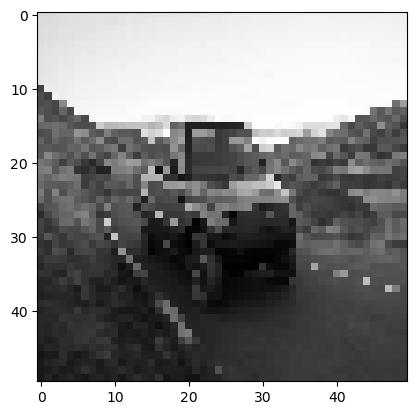

In [15]:
rd.shuffle(data)
features = []
labels = [] 
for feature, label in data:
    features.append(feature)
    labels.append(label)
    

xtrain, xtest, ytrain, ytest = train_test_split(features,labels, test_size= 0.05)

model = SVC(C = 1, gamma='auto', kernel='poly')

model.fit(xtrain, ytrain)

prediction = model.predict(xtest)
accuracy = model.score(xtest, ytest)

print("Accuracy: ", accuracy)
print("Prediction is: ", categories[prediction[0]])
emotion = xtest[0].reshape(50,50)
plt.imshow(emotion,cmap='gray')
plt.imshow


In [7]:
models_dir = r"E:\Test_car_detect\models"
pickle_path = os.path.join(models_dir, "svm.sav")
with open(pickle_path, 'wb') as file:
    pickle.dump(model, file)